<a href="https://colab.research.google.com/github/MayukhDg/Beginner-/blob/main/RNNs_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
x = np.linspace(0,50, 501)

In [36]:
#x.shape

In [37]:
y = np.sin(x)

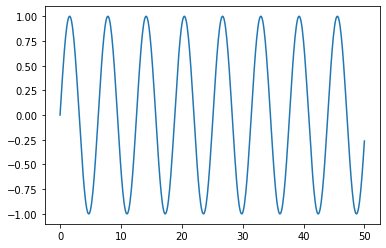

In [38]:
plt.plot(x,y)

In [39]:
df = pd.DataFrame(data=y, index=x, columns=['Sine'])

In [40]:
test_percent = 0.1

In [41]:
round(len(df)*test_percent)

50

In [42]:
test_point= np.round(len(df)*test_percent)

In [43]:
test_ind = int(len(df)-test_point)

In [44]:
test_ind

451

In [45]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [46]:
test.shape

(50, 1)

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler()

In [49]:
scaler.fit(train)

MinMaxScaler()

In [50]:
scaled_train = scaler.transform(train)

In [51]:
scaled_test = scaler.transform(test)

In [52]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
help(TimeseriesGenerator)

In [58]:
length = 50
batch_size = 1 

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size= batch_size)

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [61]:
n_features = 1

In [62]:
model = Sequential()

model.add(SimpleRNN(50, input_shape=(length, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss= 'mse' )

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.fit_generator(generator, epochs=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/5
401/401 [==============================] - 5s 8ms/step - loss: 0.0065
Epoch 2/5
401/401 [==============================] - 3s 8ms/step - loss: 1.6164e-04
Epoch 3/5
401/401 [==============================] - 3s 9ms/step - loss: 5.9045e-05
Epoch 4/5
401/401 [==============================] - 3s 8ms/step - loss: 4.3268e-04
Epoch 5/5
401/401 [==============================] - 3s 8ms/step - loss: 6.4016e-05


In [65]:
losses = pd.DataFrame(model.history.history)

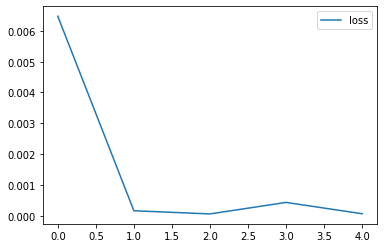

In [66]:
losses.plot()

In [67]:
first_eval_batch = scaled_train[-length:]

In [70]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [71]:
model.predict(first_eval_batch)

array([[0.94871145]], dtype=float32)

In [72]:
scaled_test[0]

array([0.94955134])

In [75]:
test_predictions=[]

first_eval_batch = scaled_train[-length:]

current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [76]:
test_predictions

[array([0.94871145], dtype=float32),
 array([0.96737516], dtype=float32),
 array([0.98112416], dtype=float32),
 array([0.9898904], dtype=float32),
 array([0.9936443], dtype=float32),
 array([0.9921453], dtype=float32),
 array([0.9857801], dtype=float32),
 array([0.9746558], dtype=float32),
 array([0.9588577], dtype=float32),
 array([0.9385822], dtype=float32),
 array([0.91419005], dtype=float32),
 array([0.88598454], dtype=float32),
 array([0.85423166], dtype=float32),
 array([0.8192608], dtype=float32),
 array([0.7813803], dtype=float32),
 array([0.7409204], dtype=float32),
 array([0.69821596], dtype=float32),
 array([0.6534913], dtype=float32),
 array([0.60716206], dtype=float32),
 array([0.5595706], dtype=float32),
 array([0.51104045], dtype=float32),
 array([0.46195683], dtype=float32),
 array([0.41274878], dtype=float32),
 array([0.3639457], dtype=float32),
 array([0.3159988], dtype=float32),
 array([0.26943743], dtype=float32),
 array([0.22481684], dtype=float32),
 array([0.18275

In [77]:
true_predictions = scaler.inverse_transform(test_predictions)

In [78]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
from tensorflow.keras.callbacks import EarlyStopping

In [83]:
early_stop = EarlyStopping(monitor='val_loss', patience = 2)

In [80]:
length = 49
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size= batch_size)


validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size= batch_size)

In [81]:
model = Sequential()

model.add(LSTM(50, input_shape=(length, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss= 'mse' )

In [84]:
model.fit_generator(generator, epochs=20, validation_data=validation_generator, callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/20
402/402 [==============================] - 11s 21ms/step - loss: 0.0105 - val_loss: 3.9659e-05
Epoch 2/20
402/402 [==============================] - 8s 20ms/step - loss: 8.4049e-05 - val_loss: 1.3682e-05
Epoch 3/20
402/402 [==============================] - 8s 20ms/step - loss: 1.2183e-04 - val_loss: 1.8414e-05
Epoch 4/20
402/402 [==============================] - 9s 22ms/step - loss: 4.9998e-05 - val_loss: 3.4470e-05


In [85]:
test_predictions=[]

first_eval_batch = scaled_train[-length:]

current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


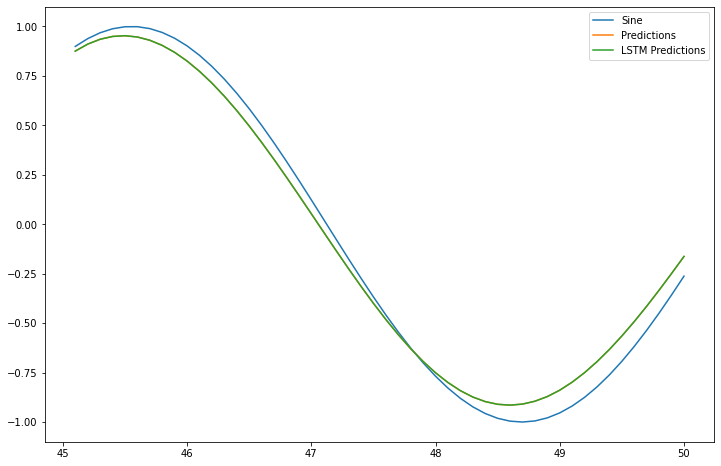

In [87]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.plot(figsize=(12,8))

In [88]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [89]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size= batch_size)

In [90]:
model = Sequential()

model.add(LSTM(50, input_shape=(length, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss= 'mse' )

In [91]:
model.fit_generator(generator, epochs=6)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/6
452/452 [==============================] - 12s 22ms/step - loss: 0.0146
Epoch 2/6
452/452 [==============================] - 10s 22ms/step - loss: 5.2324e-04
Epoch 3/6
452/452 [==============================] - 10s 22ms/step - loss: 1.2159e-04
Epoch 4/6
452/452 [==============================] - 10s 22ms/step - loss: 1.1445e-04
Epoch 5/6
452/452 [==============================] - 10s 21ms/step - loss: 1.3810e-04
Epoch 6/6
452/452 [==============================] - 9s 19ms/step - loss: 2.4867e-04


In [99]:
forecast=[]

first_eval_batch = scaled_train[-length:]

current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [100]:
forecast = scaler.inverse_transform(forecast)

In [101]:
forecast_index = np.arange(50.1,55.1,step=0.1)

In [102]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


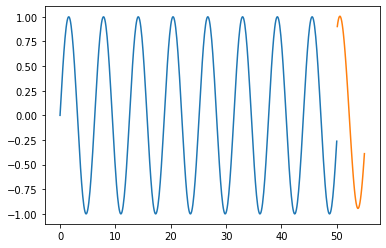

In [103]:
plt.plot(df.index,df['Sine'])
plt.plot(forecast_index,forecast)